Idea: Use PCA to reduce the data set dimensions
- first estimate appropriate range for the nr of components
- then determine the final nr of components using cross validation
- the same logic is applied for each model type, i.e. LR, LDA and SVM

In [1]:
import pandas as pd
from sklearn import feature_selection
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.feature_selection import RFECV
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.exceptions import DataConversionWarning
import warnings
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

In [2]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv('test.csv')

In [3]:
X_all_train = train_df.loc[:, train_df.columns != 'categories']
y_all_train = train_df.loc[:, train_df.columns == 'categories']

Note: Since the files could not be uploaded due to the size and the split procedure is random, the exact
results reported in the report might be slightly different.

In [ ]:
# done once! the files to obtain the same results are provided in the submission
X_train, X_test, y_train, y_test = train_test_split(X_all_train, y_all_train, test_size=0.25, random_state=0)
# # Save to files in order to work with the same datasets!
X_train.to_csv('x_train.csv', index=False)
X_test.to_csv('x_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

In [4]:
X_train = pd.read_csv("x_train.csv")
X_test = pd.read_csv("x_test.csv")
y_train = pd.read_csv("y_train.csv")
y_test = pd.read_csv("y_test.csv")

In [5]:
y_train = y_train.categories
y_test = y_test.categories


In [6]:
y_all_train = y_all_train.categories

In [7]:
X_train = pd.read_csv("x_train.csv")
X_test = pd.read_csv("x_test.csv")
y_train = pd.read_csv("y_train.csv")
y_test = pd.read_csv("y_test.csv")

# Data preparation

In [14]:
scaler = StandardScaler()

# Fit on training set only.
scaler.fit(X_all_train)

# Apply transform to both the training set and the test set.
train_std = scaler.transform(X_train)
test_std = scaler.transform(X_test)

# PCA benchmarks 

In [9]:
benchmark_cols = ['Variance retained','n_Components','Time(s)','Accuracy_percentage']

def benchmark_pca(model, benchmark, variance, train_set, train_y, test_set, test_y):
    #global benchmark
    print('Variance to obtain', variance)
    pca = PCA(variance)
    pca.fit(train_set)
    n_components = pca.n_components_
    print('Retained components', n_components)
    train_set = pca.transform(train_set)

    # pca.fit(test_set)
    test_set = pca.transform(test_set)
    start = time.time()
    model.fit(train_set, train_y)
    end =  time.time()
 
    timing = end-start   

    # Predict for Multiple Observations (images) at Once
    predicted = model.predict(test_set)   

    # generate evaluation metrics
    accuracy = (metrics.accuracy_score(test_y, predicted))
    #return 
    a = dict(zip(benchmark_cols,[variance,n_components,timing,accuracy]))
    benchmark = benchmark.append(a,ignore_index=True)
    return benchmark

In [10]:
def benchmark_pca_variance(model, train_std, y_train, test_std, y_test):
    variance_list = [0.95,0.90,0.85,0.80,0.75,0.70,0.6]
    benchmark = pd.DataFrame(columns = benchmark_cols)
    for variance in variance_list:
        benchmark = benchmark_pca(model, benchmark, variance, train_std, y_train, test_std, y_test)
    print('Final benchmark results:')
    print(benchmark)
    return benchmark
    

In [11]:
def visualise_benchmark(benchmark, model_name):
    #1
    benchmark.plot(x=0,y=-1)
    plt.title("variance vs accuracy")
    plt.savefig('var_acc_'+model_name+'.png')
    plt.gcf().clear()
    #2
    benchmark.plot(x=1,y=-1)
    plt.title("no of components vs accuracy")
    plt.savefig('comp_acc_'+model_name+'.png')
    plt.gcf().clear()
    #3
    benchmark.plot(x=2,y=-1)
    plt.savefig('time_acc_'+model_name+'.png')
    plt.title("time vs accuracy")
    plt.gcf().clear()

### KNN

In [105]:
knn = KNeighborsClassifier()

In [106]:
benchmark = benchmark_pca_variance(knn, train_std, y_train, test_std, y_test)

Variance to obtain 0.95
Retained components 1553


/Users/sdoneva/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app


Variance to obtain 0.9
Retained components 985


/Users/sdoneva/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app


Variance to obtain 0.85
Retained components 661


/Users/sdoneva/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app


Variance to obtain 0.8
Retained components 449


/Users/sdoneva/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app


Variance to obtain 0.75
Retained components 305


/Users/sdoneva/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app


Variance to obtain 0.7
Retained components 207


/Users/sdoneva/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app


Variance to obtain 0.6
Retained components 95


/Users/sdoneva/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app


Final benchmark results:
   Variance retained  n_Components   Time(s)  Accuracy_percentage
0               0.95        1553.0  0.794998             0.970256
1               0.90         985.0  0.351879             0.973333
2               0.85         661.0  0.258870             0.974359
3               0.80         449.0  0.161617             0.976410
4               0.75         305.0  0.169390             0.976923
5               0.70         207.0  0.064817             0.978462
6               0.60          95.0  0.023734             0.982051


In [107]:
visualise_benchmark(benchmark, 'knn_pca')

### Log Regression

In [29]:
clf_log_reg = LogisticRegression(penalty='l2',solver='saga', max_iter=3000, n_jobs=-1)

In [30]:
benchmark = benchmark_pca_variance(clf_log_reg, train_std, y_train, test_std, y_test)

Variance to obtain 0.95
Retained components 1553


/Users/sdoneva/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Variance to obtain 0.9
Retained components 985


/Users/sdoneva/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Variance to obtain 0.85
Retained components 661


/Users/sdoneva/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Variance to obtain 0.8
Retained components 449


/Users/sdoneva/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Variance to obtain 0.75
Retained components 305


/Users/sdoneva/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/sdoneva/anaconda/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Variance to obtain 0.7
Retained components 207


/Users/sdoneva/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/sdoneva/anaconda/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Variance to obtain 0.6
Retained components 95


/Users/sdoneva/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Final benchmark results:
   Variance retained  n_Components      Time(s)  Accuracy_percentage
0               0.95        1553.0   598.392705             0.985641
1               0.90         985.0   525.547376             0.987179
2               0.85         661.0   819.847439             0.984103
3               0.80         449.0   989.716344             0.982564
4               0.75         305.0  1140.606550             0.980513
5               0.70         207.0   852.639557             0.981538
6               0.60          95.0  1313.463665             0.982051


In [31]:
visualise_benchmark(benchmark, 'log_regression_pca')

### LDA

In [14]:
clf_lda = LinearDiscriminantAnalysis() # TODO: use eigen

In [22]:
benchmark = benchmark_pca_variance(clf_lda, train_std, y_train, test_std, y_test)

Variance to obtain 0.95
Retained components 1553
Variance to obtain 0.9
Retained components 985
Variance to obtain 0.85
Retained components 661
Variance to obtain 0.8
Retained components 449
Variance to obtain 0.75
Retained components 305
Variance to obtain 0.7
Retained components 207
Variance to obtain 0.6
Retained components 95
Final benchmark results:
   Variance retained  n_Components    Time(s)  Accuracy_percentage
0               0.95        1553.0  11.643113             0.982564
1               0.90         985.0   5.741668             0.983077
2               0.85         661.0   2.362174             0.983077
3               0.80         449.0   1.211744             0.984103
4               0.75         305.0   0.797763             0.984103
5               0.70         207.0   0.446125             0.984103
6               0.60          95.0   0.215611             0.984103


In [23]:
visualise_benchmark(benchmark, 'lda_pca')

### SVM

In [12]:
clf_svc = SVC(kernel='linear', C=1E10)

In [15]:
benchmark = benchmark_pca_variance(clf_svc, train_std, y_train, test_std, y_test)

Variance to obtain 0.95
Retained components 1553
Variance to obtain 0.9
Retained components 985
Variance to obtain 0.85
Retained components 660
Variance to obtain 0.8
Retained components 449
Variance to obtain 0.75
Retained components 305
Variance to obtain 0.7
Retained components 207
Variance to obtain 0.6
Retained components 95
Final benchmark results:
   Variance retained  n_Components   Time(s)  Accuracy_percentage
0               0.95        1553.0  9.732868             0.985128
1               0.90         985.0  5.759043             0.984103
2               0.85         660.0  3.618488             0.985128
3               0.80         449.0  2.214851             0.984103
4               0.75         305.0  1.507022             0.982051
5               0.70         207.0  0.859414             0.980513
6               0.60          95.0  0.333904             0.976923


In [16]:
visualise_benchmark(benchmark, 'svm_pca')

# CV for final nr of components

In [115]:
def evaluate_pca_pipeline_cv(algorithm, pca_components_list, X_train, y_train, model_name):
    # create pipeline
    estimators = []
    
    estimators.append(('standardize', preprocessing.StandardScaler()))
    estimators.append(('pca', PCA()))
    estimators.append(('model', algorithm))
    model = Pipeline(estimators)
    
    # evaluate pipeline
    # Parameters of pipelines can be set using ‘__’ separated parameter names:
    param_grid = {
        'pca__n_components': pca_components_list}

    search = GridSearchCV(model, param_grid, iid=False, cv=5,
                          return_train_score=False)
    search.fit(X_train, y_train)
    print("Best parameter (CV score=%0.3f):" % search.best_score_)
    print("Best parameter", search.best_params_)
    print()
    print(search.cv_results_)
    
    plot_grid_search(search.cv_results_, pca_components_list, 'knn_components_cv_results', model_name)

In [116]:
# see for multile grid params: https://stackoverflow.com/questions/37161563/how-to-graph-grid-scores-from-gridsearchcv
# see for test/train plotting: https://chrisalbon.com/machine_learning/model_evaluation/plot_the_validation_curve/
def plot_grid_search(cv_results, grid_params, filename, model_name):
    # Get Test Scores Mean and std for each grid search
    scores_mean = cv_results['mean_test_score']
    scores_mean = np.array(scores_mean)
    
    plt.plot(grid_params, scores_mean, color='seagreen', marker='o')
    plt.xlabel('PCA Components', fontsize=15)
    plt.ylabel('5-fold CV Accuracy ', fontsize=15)
    plt.title(model_name, fontsize=15)
    ax = plt.gca()
    ax.set_facecolor('white')
    #ax.legend([''], fontsize=15)
    plt.xticks(size = 10)
    plt.yticks(size = 10)
    max_score_indx = np.argmax(scores_mean)
    plt.axvline(x=grid_params[max_score_indx], color='r', linestyle='--')
    
    plt.savefig(filename +'.png')
    plt.show()
    plt.gcf().clear()
    
# Calling Method 
# plot_grid_search(pipe_grid.cv_results_, n_estimators, max_features, 'N Estimators', 'Max Features')

In [114]:
from sklearn.exceptions import DataConversionWarning
import warnings
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

### KNN

Best parameter (CV score=0.981):
Best parameter {'pca__n_components': 20}

{'mean_fit_time': array([4.59340339, 4.73141918, 5.09474883, 5.78323431, 6.39812236,
       6.72257519, 5.20663319]), 'std_fit_time': array([0.40276021, 0.12369605, 0.15855728, 0.07022356, 0.07596619,
       1.55849621, 0.02936262]), 'mean_score_time': array([0.16480999, 0.28885136, 0.62048435, 1.09339714, 1.19968157,
       1.46363726, 1.54093862]), 'std_score_time': array([0.02221898, 0.04915038, 0.14003689, 0.13186258, 0.07674126,
       0.32914482, 0.04715137]), 'param_pca__n_components': masked_array(data=[5, 20, 40, 60, 80, 100, 120],
             mask=[False, False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'pca__n_components': 5}, {'pca__n_components': 20}, {'pca__n_components': 40}, {'pca__n_components': 60}, {'pca__n_components': 80}, {'pca__n_components': 100}, {'pca__n_components': 120}], 'split0_test_score': array([0.94358974, 0.98461538, 0.985

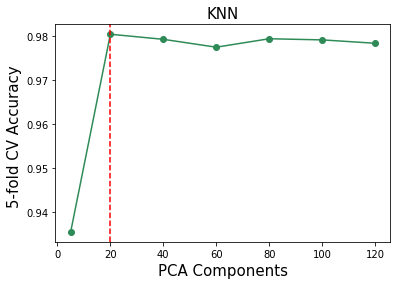

In [119]:
clf_knn = KNeighborsClassifier() 
pca_components_list_knn = [5, 20, 40, 60, 80, 100, 120]
evaluate_pca_pipeline_cv(clf_knn, pca_components_list_knn, X_all_train, y_all_train, 'KNN')

### LDA

In [8]:
def evaluate_lda_pipeline_cv(X_train, y_train, lda_components_list):
    # create pipeline
    estimators = []
    
    estimators.append(('standardize', preprocessing.StandardScaler()))
    estimators.append(('lda', LinearDiscriminantAnalysis()))
    model = Pipeline(estimators)
    
    # evaluate pipeline
    # Parameters of pipelines can be set using ‘__’ separated parameter names:
    param_grid = {
        'lda__n_components': lda_components_list} 

    search = GridSearchCV(model, param_grid, iid=False, cv=5,
                          return_train_score=False)
    search.fit(X_train, y_train)
    print("Best parameter (CV score=%0.3f):" % search.best_score_)
    print("Best parameter", search.best_params_)
    print()
    print(search.cv_results_)
    plot_grid_search(search.cv_results_, lda_components_list, 'lda_components_cv_results', 'LDA')

In [9]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning) #   warnings.warn("Variables are collinear.")

In [13]:
lda_components_list = [1,5,10]  # Number of components (< n_classes - 1) for dimensionality reduction.

Best parameter (CV score=0.993):
Best parameter {'lda__n_components': 1}

{'mean_fit_time': array([107.32143502, 122.21640105, 109.83810539]), 'std_fit_time': array([ 3.39153128, 14.23388614,  5.26395984]), 'mean_score_time': array([0.17995162, 0.2308866 , 0.17698169]), 'std_score_time': array([0.01800641, 0.07007398, 0.00814567]), 'param_lda__n_components': masked_array(data=[1, 5, 10],
             mask=[False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'lda__n_components': 1}, {'lda__n_components': 5}, {'lda__n_components': 10}], 'split0_test_score': array([0.99551282, 0.99551282, 0.99551282]), 'split1_test_score': array([0.99102564, 0.99102564, 0.99102564]), 'split2_test_score': array([0.99230769, 0.99230769, 0.99230769]), 'split3_test_score': array([0.99294872, 0.99294872, 0.99294872]), 'split4_test_score': array([0.99551282, 0.99551282, 0.99551282]), 'mean_test_score': array([0.99346154, 0.99346154, 0.99346154]), 'std_test_score': array([0.001785

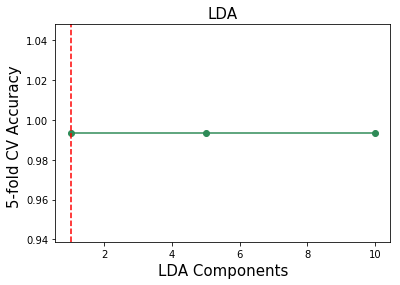

In [14]:
evaluate_lda_pipeline_cv(X_all_train, y_all_train, lda_components_list)

Best parameter (CV score=0.982):
Best parameter {'pca__n_components': 280}

{'mean_fit_time': array([ 3.75061359,  3.62151666,  3.99457645,  4.49201818,  4.99370537,
        5.6947124 ,  5.91448793,  6.3880754 ,  6.65719275,  7.29656806,
        7.7878706 ,  8.44489064,  9.118501  ,  8.97022095, 10.703372  ,
       10.21544843]), 'std_fit_time': array([0.37191301, 0.01058796, 0.05520422, 0.03619017, 0.12640196,
       0.1360285 , 0.09911617, 0.08007864, 0.09233403, 0.10371202,
       0.2367435 , 0.62710774, 0.81658424, 0.02303139, 1.34816452,
       0.36031863]), 'mean_score_time': array([0.14523091, 0.11957245, 0.17086439, 0.17568884, 0.18264627,
       0.19769363, 0.20187821, 0.20478802, 0.20543365, 0.20916104,
       0.2326148 , 0.22718153, 0.22560992, 0.22961621, 0.25115218,
       0.24218578]), 'std_score_time': array([0.00888332, 0.00660011, 0.00469648, 0.00281256, 0.00866753,
       0.00711317, 0.00404241, 0.01107201, 0.00664663, 0.00255784,
       0.0321045 , 0.01504965, 0.0029

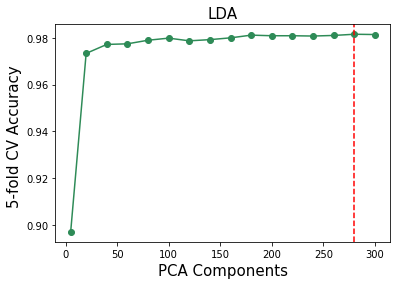

In [67]:
clf_lda = LinearDiscriminantAnalysis() # TODO: use eigen
pca_components_list_lda = [5, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300]
evaluate_pca_pipeline_cv(clf_lda, pca_components_list_lda, X_all_train, y_all_train, 'LDA')

### SVM

Best parameter (CV score=0.986):
Best parameter {'pca__n_components': 2500}

{'mean_fit_time': array([ 14.49962635,  18.5128334 ,  17.04440985,  32.93997102,
        31.77408051,  52.09696984,  68.48967662, 112.58074865,
       105.49421048, 124.59715109]), 'std_fit_time': array([ 0.62615914,  0.61432498,  0.5277262 ,  2.82429796,  1.98160337,
        4.12713173,  0.58789419, 32.76885693, 10.2558505 , 68.28526881]), 'mean_score_time': array([0.84671602, 1.16813707, 1.46450133, 2.6479794 , 2.85319586,
       4.71648636, 5.72900825, 7.22165585, 8.05165052, 9.3287858 ]), 'std_score_time': array([0.02527177, 0.08045884, 0.13857391, 0.12503884, 0.13605174,
       0.52146336, 0.09261315, 0.0638869 , 0.29744856, 0.1146419 ]), 'param_pca__n_components': masked_array(data=[300, 400, 500, 900, 1000, 1500, 2000, 2500, 3000, 3500],
             mask=[False, False, False, False, False, False, False, False,
                   False, False],
       fill_value='?',
            dtype=object), 'params':

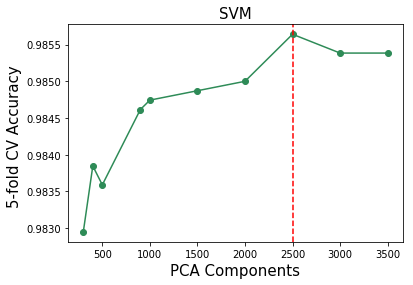

In [27]:
clf_svc = SVC(kernel='linear', C=1E10)
pca_components_list_svm = [300, 400, 500, 900, 1000, 1500, 2000, 2500, 3000, 3500]
evaluate_pca_pipeline_cv(clf_svc, pca_components_list_svm, X_all_train, y_all_train, 'SVM')

### Log Regression

In [24]:
#from sklearn.exceptions import FutureWarning
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)

Best parameter (CV score=0.984):
Best parameter {'pca__n_components': 1100}

{'mean_fit_time': array([ 230.55718012,  276.84537625,  410.32290487,  640.03983822,
        477.31202374,  567.12099547, 1867.93078213]), 'std_fit_time': array([  10.04514055,   17.0309574 ,   29.63399487,  319.47006183,
         28.25631377,  156.4139993 , 2318.40125605]), 'mean_score_time': array([0.37514815, 0.39543953, 0.56026325, 0.55049462, 0.57503104,
       0.54672775, 0.78025022]), 'std_score_time': array([0.06708543, 0.04690179, 0.14683428, 0.09848732, 0.06683819,
       0.00654897, 0.08923047]), 'param_pca__n_components': masked_array(data=[400, 500, 800, 900, 1000, 1100, 1500],
             mask=[False, False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'pca__n_components': 400}, {'pca__n_components': 500}, {'pca__n_components': 800}, {'pca__n_components': 900}, {'pca__n_components': 1000}, {'pca__n_components': 1100}, {'pca__n_components': 150

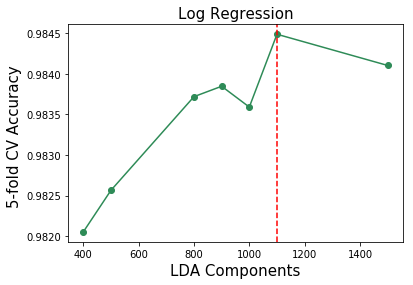

In [25]:
logreg_l2 = LogisticRegression(penalty='l2',solver='saga', max_iter=3000, n_jobs=-1)
pca_components_list_log = [400, 500, 800, 900, 1000, 1100, 1500]
evaluate_pca_pipeline_cv(logreg_l2, pca_components_list_log, X_all_train, y_all_train, 'Log Regression')

# Visualisations

In [10]:
#https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

### PCA

In [58]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(train_std)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [59]:
targets_train = train_df.loc[:, train_df.columns == 'categories']

In [60]:
finalDf = pd.concat([principalDf, targets_train[['categories']]], axis = 1)

In [61]:
finalDf.head()

,principal component 1,principal component 2,categories
0,-12.133534,21.757475,0
1,-7.933527,15.492664,0
2,-11.116447,23.699116,0
3,-13.937126,20.478139,0
4,-9.725359,21.177356,0


In [62]:
finalDf.groupby('categories').count()

,principal component 1,principal component 2
categories,,
0,650,650
1,650,650
2,650,650
3,650,650
4,650,650
5,650,650
6,650,650
7,650,650
8,650,650


In [66]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
colors = ['r', 'maroon', 'coral', 'orange',
            'olive', 'g', 'b', 'y',
            'purple', 'sienna', 'darkseagreen', 'skyblue']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['categories'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [67]:
plt.savefig('pca_2_components_visual' +'.png')

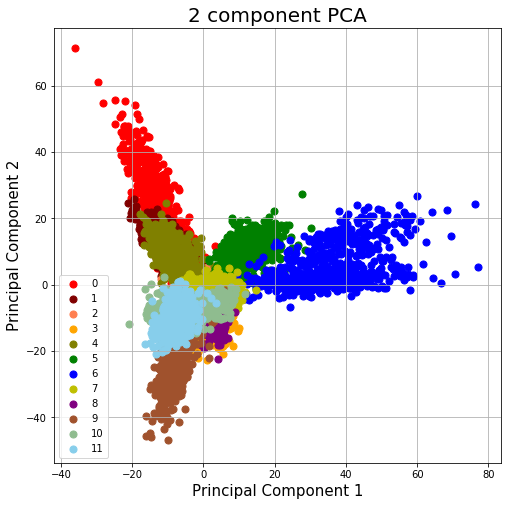

In [68]:
plt.show()

In [70]:
plt.gcf().clear()

### LDA

In [69]:
lda = LinearDiscriminantAnalysis(n_components=2)
ldaComponents = lda.fit_transform(train_std, y_all_train)
ldalDf = pd.DataFrame(data = ldaComponents
             , columns = ['lda component 1', 'lda component 2'])

/Users/sdoneva/anaconda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [34]:
finalDf_lda = pd.concat([ldalDf, targets_train[['categories']]], axis = 1)

In [71]:
finalDf_lda.head()

,lda component 1,lda component 2,categories
0,-31.383258,3.428200,0
1,-31.133292,2.614232,0
2,-31.251893,4.283051,0
3,-30.377577,4.343752,0
4,-31.357378,4.113360,0


In [72]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('LDA Component 1', fontsize = 15)
ax.set_ylabel('LDA Component 2', fontsize = 15)
ax.set_title('2 component LDA', fontsize = 20)
targets = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
colors = ['r', 'maroon', 'coral', 'orange',
            'olive', 'g', 'b', 'y',
            'purple', 'sienna', 'darkseagreen', 'skyblue']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf_lda['categories'] == target
    ax.scatter(finalDf_lda.loc[indicesToKeep, 'lda component 1']
               , finalDf_lda.loc[indicesToKeep, 'lda component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [73]:
plt.savefig('lda_2_components_visual' +'.png')

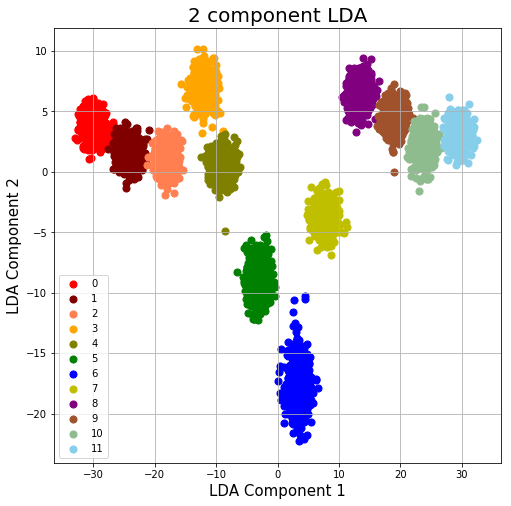

In [74]:
plt.show()

In [ ]:
plt.gcf().clear()

# Once nr of components has been chosen

In [7]:
def generate_predictions_file(estimator, test_df, filename):
    test_df = test_df.copy()
    y_pred = estimator.predict(test_df)
    test_df['categories'] = pd.Series(y_pred, index=test_df.index)
    submission = test_df[['id','categories']]
    submission.to_csv(filename + '.csv', index=False)

In [ ]:
# KNN
knn_pca_pipe = Pipeline([('standardize', preprocessing.StandardScaler()),('pca', PCA(n_components = 20)), ('knn', KNeighborsClassifier())]) #create pipeline from pca to svm space
fit = knn_pca_pipe.fit(X_all_train, y_all_train) #fit model

In [ ]:
generate_predictions_file(knn_pca_pipe, test_df, 'knn_pca_20')

In [ ]:
# SVM
clf_svm_pca_pipe = Pipeline([('standardize', preprocessing.StandardScaler()),('pca', PCA(n_components = 2500)), ('svc', clf_svc)]) #create pipeline from pca to svm space
fit = clf_svm_pca_pipe.fit(X_all_train, y_all_train) #fit model

In [ ]:
generate_predictions_file(clf_svm_pca_pipe, test_df, 'svm_linear_pca_2500')

In [15]:
# LDA - PCA
lda_clf = LinearDiscriminantAnalysis()
clf_lda_pca_pipe = Pipeline([('standardize', preprocessing.StandardScaler()), ('pca', PCA(n_components = 280)), ('lda', lda_clf)]) #create pipeline from pca to svm space
fit = clf_lda_pca_pipe.fit(X_all_train, y_all_train) #fit model

In [17]:
generate_predictions_file(clf_lda_pca_pipe, test_df, 'lda_svd_pca_280')

In [18]:
# LDA - Dim Reduction
lda_clf_dim = LinearDiscriminantAnalysis(n_components=2)
clf_lda_dim_red_pipe = Pipeline([('standardize', preprocessing.StandardScaler()), ('lda', lda_clf_dim)]) #create pipeline from pca to svm space
fit = clf_lda_dim_red_pipe.fit(X_all_train, y_all_train) #fit model

In [ ]:
generate_predictions_file(clf_lda_dim_red_pipe, test_df, 'lda_n_components_2')

In [8]:
# Logistic Regression
log_reg_clf = LogisticRegression(penalty='l2', solver='saga', max_iter=3000, n_jobs=-1)
clf_log_reg_dim_red_pipe = Pipeline([('standardize', preprocessing.StandardScaler()), ('pca', PCA(n_components = 1100)), ('logreg', log_reg_clf)]) #create pipeline from pca to svm space
fit = clf_log_reg_dim_red_pipe.fit(X_all_train, y_all_train) #fit model

/Users/sdoneva/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/sdoneva/anaconda/lib/python3.6/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/Users/sdoneva/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [9]:
generate_predictions_file(clf_log_reg_dim_red_pipe, test_df, 'log_reg_l2_pca_1100')

/Users/sdoneva/anaconda/lib/python3.6/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
